In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("AirPassengers.csv",index_col='date')
data.head(20)

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [3]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['value'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))


ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


<Axes: xlabel='date'>

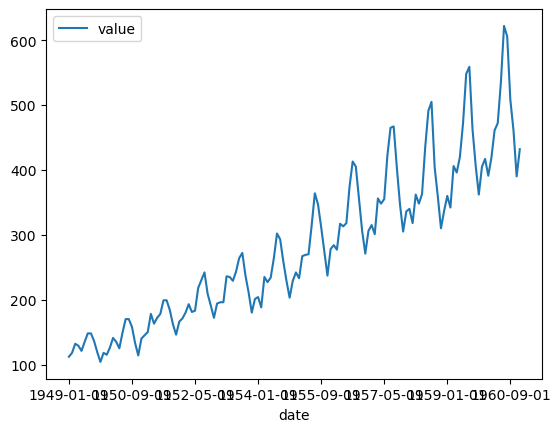

In [4]:
data.plot()

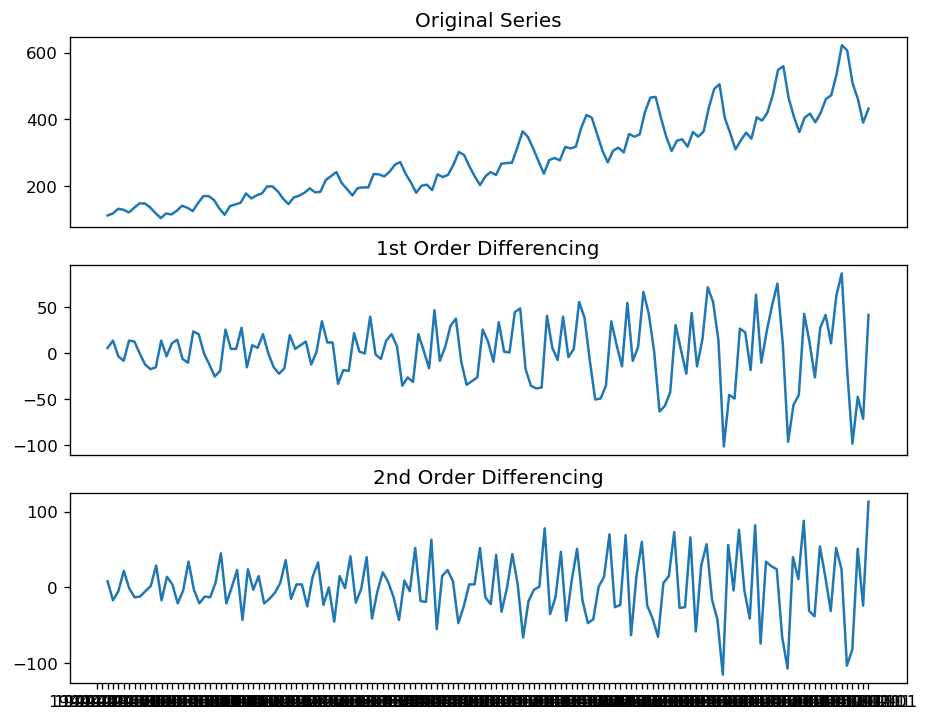

In [5]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(data.value); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(data.value.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(data.value.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()


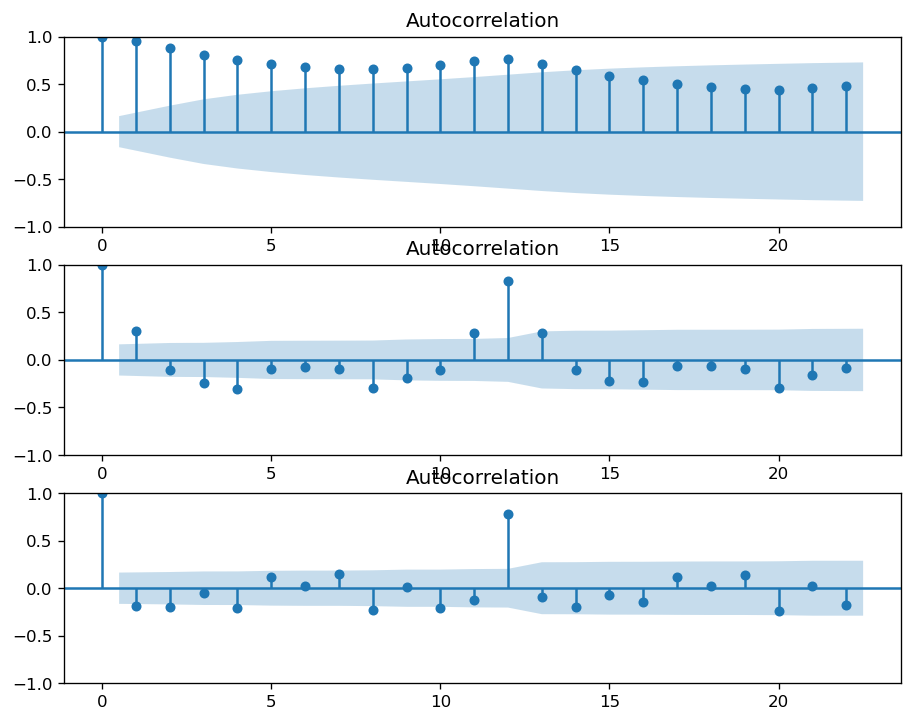

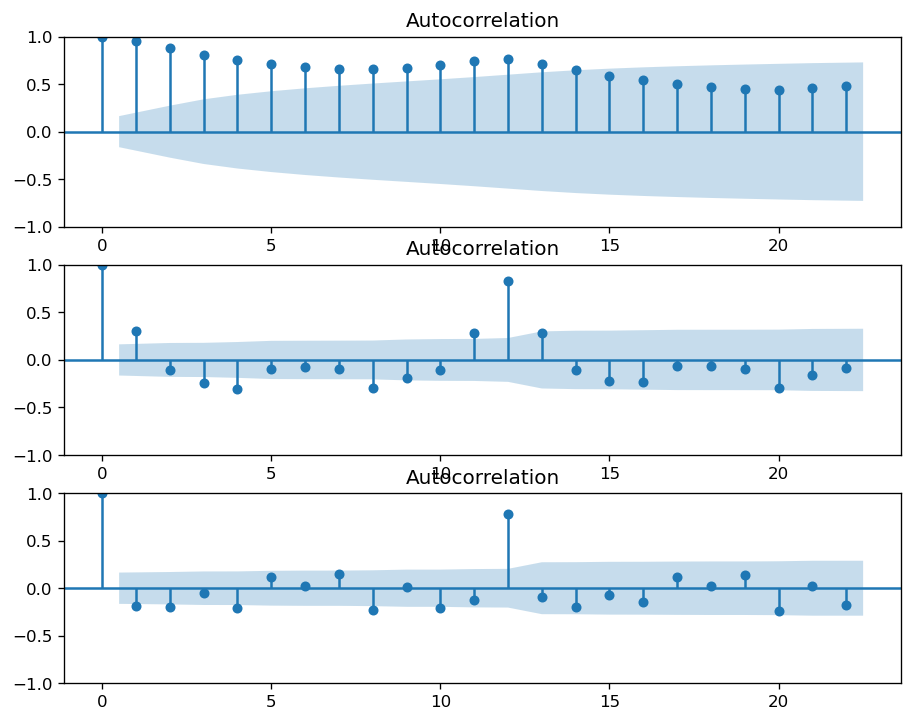

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(data.value, ax=ax1)
plot_acf(data.value.diff().dropna(), ax=ax2)
plot_acf(data.value.diff().diff().dropna(), ax=ax3)


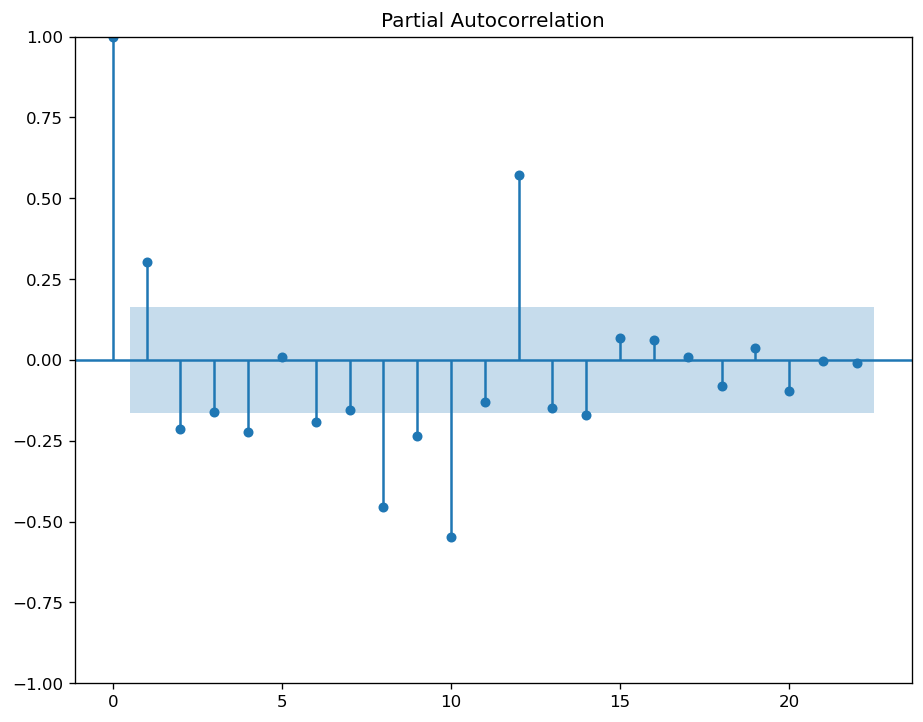

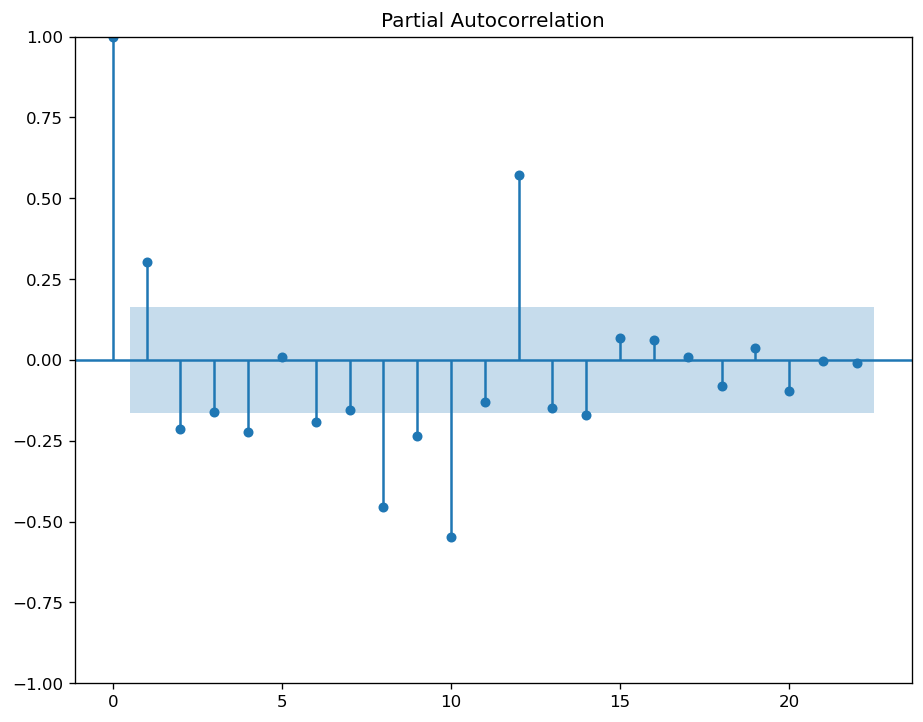

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data.value.diff().dropna())

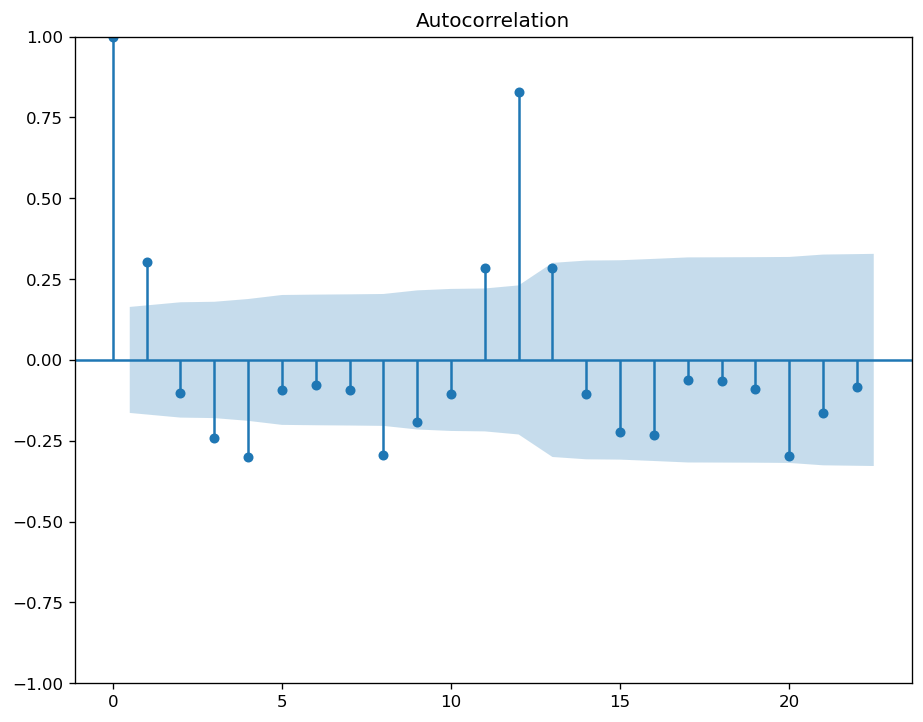

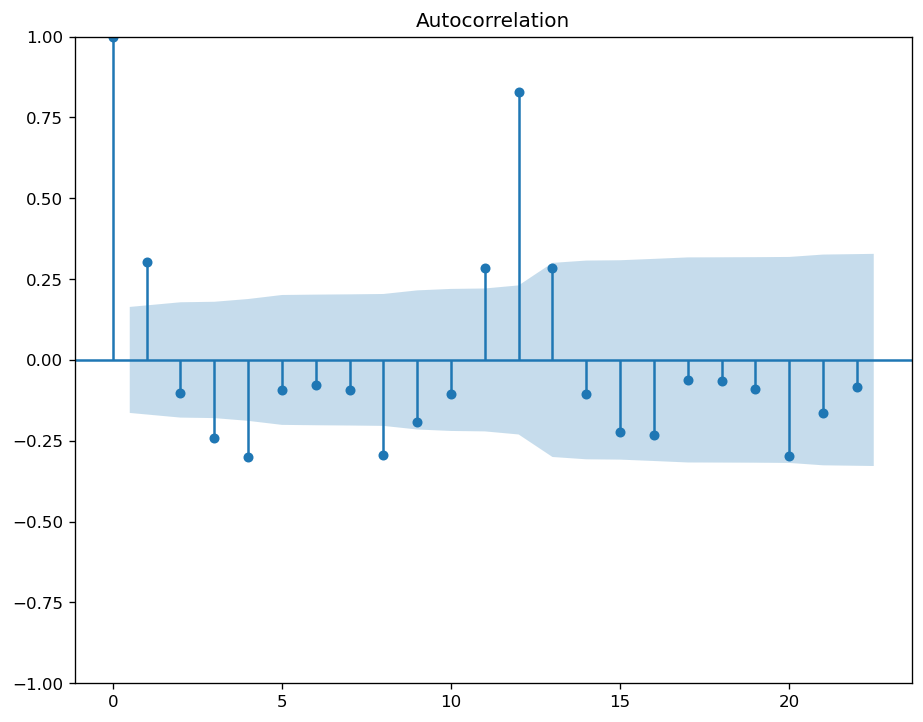

In [8]:
plot_acf(data.value.diff().dropna())

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
ARIMAmodel= SARIMAX(data.value, order = (1,1,2))
ARIMAmodel = ARIMAmodel.fit(disp=0)
ARIMAmodel.summary()

D:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  144
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -688.749
Date:                Tue, 01 Apr 2025   AIC                           1385.498
Time:                        19:31:56   BIC                           1397.349
Sample:                    01-01-1949   HQIC                          1390.313
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5724      0.097      5.928      0.000       0.383       0.762
ma.L1         -0.3126      0.098     -3.198      0.001      -0.504      -0.121
ma.L2         -0.5078      0.069     -7.412      0.000      -0.642      -0.373
sigma2       889.2132    103.456      8.595      0.000     686.443    1091.983
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.15
Prob(Q):                              0.81   Prob(JB):                         0.93
Heteroskedasticity (H):               7.62   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
data.value

date
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: value, Length: 144, dtype: int64

In [19]:
y_pred = ARIMAmodel.get_forecast(len(data.index))
#y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0],
                                              end = y_pred_df.index[-1])
y_pred_df.index = data.index
y_pred_outARIMA = y_pred_df["Predictions"]

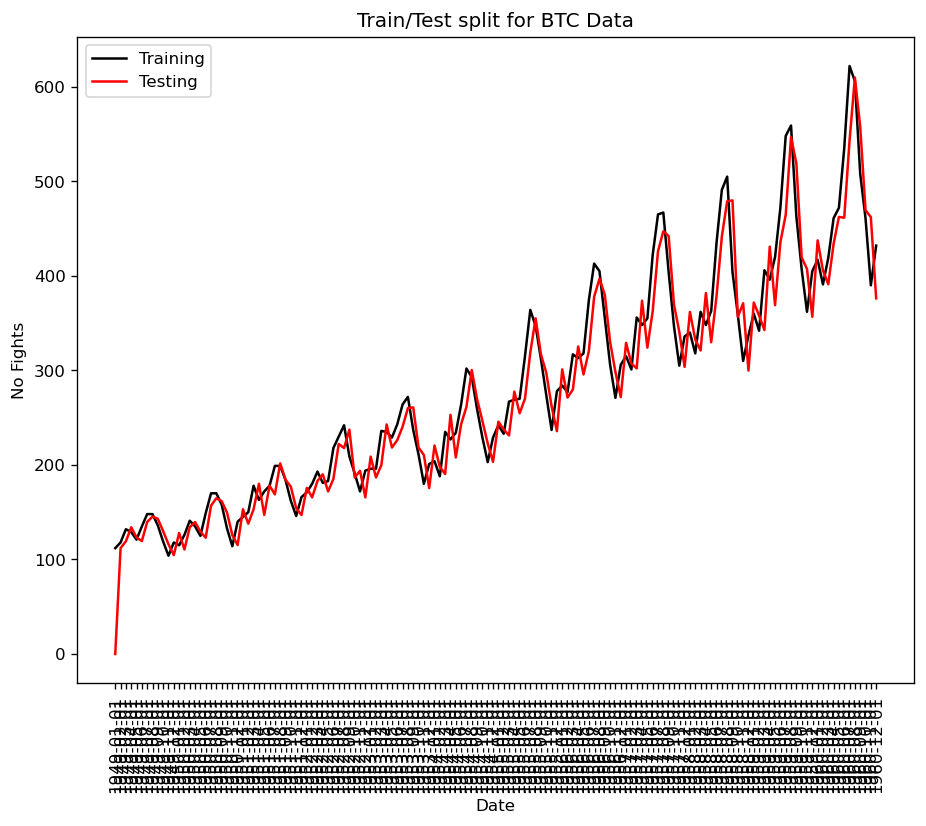

In [22]:
plt.plot(data, color = "black", label = 'Training')
plt.plot(y_pred_outARIMA, color = "red", label = 'Testing')
plt.ylabel('No Fights')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.title("Train/Test split for BTC Data")
#plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.legend()
plt.show()